In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 232, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [2]:
SEED = int((99423 + 99616 + 97649 + 99131)/4)
random.seed(SEED)
GCL_PREVIOUS_STATE = SEED

In [3]:
def gcl_generator() -> int:
    global GCL_PREVIOUS_STATE
    new_number = (1013904223 * GCL_PREVIOUS_STATE + 1664525) % 2**32
    GCL_PREVIOUS_STATE = new_number
    return new_number

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [4]:
def gcl_between_0_and_1() -> float:
    return gcl_generator()/2**32

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

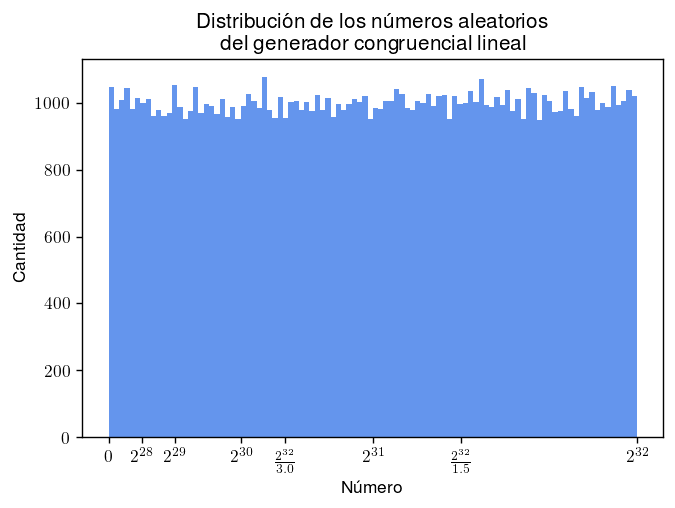

In [5]:
samples_gcl = [gcl_generator() for _ in range(100000)]
plt.figure(dpi=125)
plt.title('Distribución de los números aleatorios\n del generador congruencial lineal')
plt.hist(samples_gcl, bins=100, color="cornflowerblue")
plt.ylabel("Cantidad")
plt.xticks([0]+[2**i for i in range(28,33)]+[2**32/i for i in [3,1.5]],
           [r"$0$"]+[r"$2^{%d}$"%i for i in range(28,33)]+[r"$\frac{2^{32}}{%.1f}$"%i for i in [3,1.5]])
plt.xlabel("Número")
plt.show()

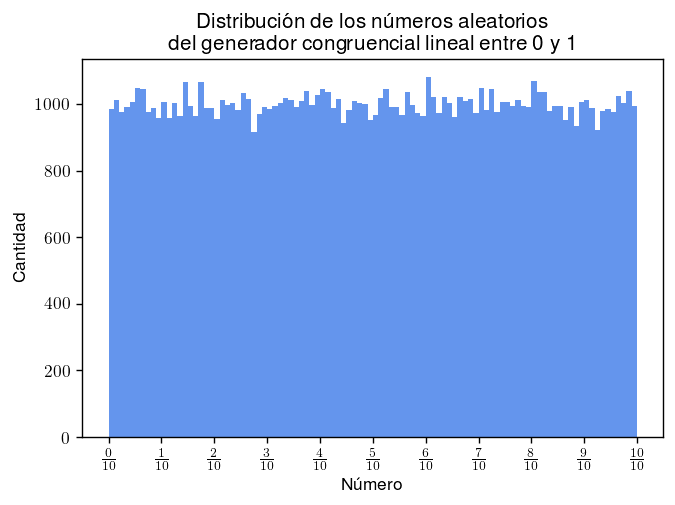

In [6]:
samples_gcl = [gcl_between_0_and_1() for _ in range(100000)]
plt.figure(dpi=125)
plt.title('Distribución de los números aleatorios\n del generador congruencial lineal entre 0 y 1')
plt.hist(samples_gcl, bins=100, color="cornflowerblue")
plt.ylabel("Cantidad")
plt.xticks([i/10 for i in range(0, 11)], [r"$\frac{%d}{10}$"%i for i in range(0, 11)])
plt.xlabel("Número")
plt.show()

# Ejercicio 2

Proponer, y realizar, al menos 2 tests sobre el generador congruencial lineal implementado en el Ejercicio 1.
Evaluar e interpretar los resultados de cada uno.

### Primer test

Realizamos un test chi cuadrado sobre el último dígito del generador con una significancia del 1% y una muestra de tamaño 100.000 a partir de las siguientes hipótesis:

* H0: La distribución es uniforme
* H1: La distribución no es uniforme

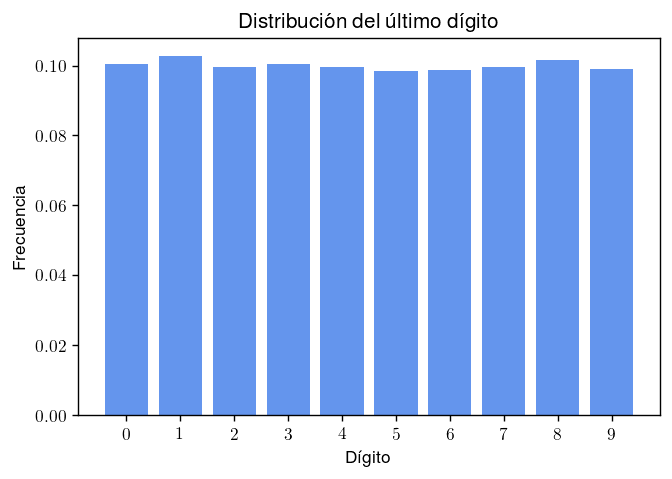

In [7]:
from collections import Counter
GCL_PREVIOUS_STATE = SEED
sample = [str(gcl_generator())[-1] for i in range(100000)]
occurence_counter = Counter(sample)
plt.figure(dpi=125)
plt.title(r"Distribución del último dígito")
plt.bar([r"$%d$"%i for i in range(0,10)], 
        [occurence_counter["%d"%i]/sum(occurence_counter.values()) for i in range(0,10)], 
        color="cornflowerblue")
plt.xlabel("Dígito")
plt.ylabel("Frecuencia")
plt.show()

Como tenemos 10 clases tenemos trabajamos con 9 grados de libertad 

$$X^2_{9,0.99}=21.66$$

Sabemos que la probabilidad de cada dígito debiera ser $p_i=\frac{1}{10}$, calculamos: 

$$D^2=\sum^9_{i=0}{\frac{(n_{obs i}-Np_i)^2}{Np_i}}$$

In [8]:
d_squared = 0
sample_size = sum(occurence_counter.values())
for k in [str(i) for i in range(10)]:
    d_squared += ((occurence_counter[k]-sample_size*0.1)**2)/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  16.9624


Como $D^2=16.9624 < D_α=21.66$ no somos capaces de rechazar **H0**

### Segundo test

Realizamos un test chi cuadrado sobre el primer dígito decimal mod 4 despues de la coma del generador [0,1] con una muestra de 1000 y significacion del 10%
* H0: La distribución es uniforme
* H1: La distribución no es uniforme

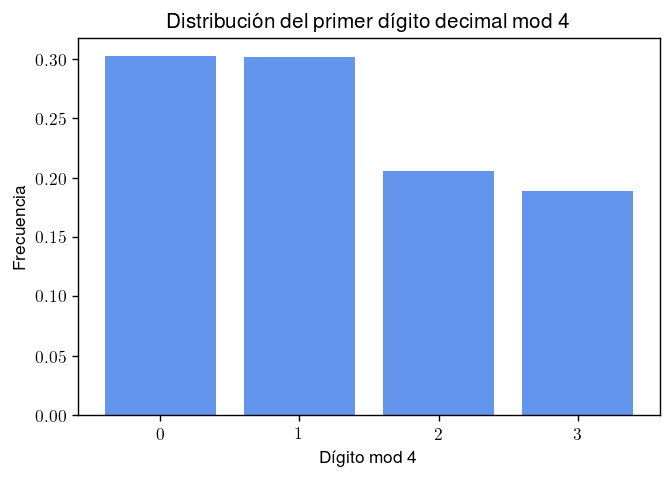

In [9]:
from collections import Counter
GCL_PREVIOUS_STATE = SEED
sample = [int(str(gcl_between_0_and_1())[2]) % 4 for i in range(1000)]
occurence_counter = Counter(sample)
plt.figure(dpi=125)
plt.title(r"Distribución del primer dígito decimal mod 4")
plt.bar([r"$%d$"%i for i in range(0,4)], 
        [occurence_counter[i]/sum(occurence_counter.values()) for i in range(0,4)], 
        color="cornflowerblue")
plt.xlabel(r"Dígito mod 4")
plt.ylabel(r"Frecuencia")
plt.show()

Como tenemos 4 clases tenemos trabajamos con 3 grados de libertad 

$$X^2_{3,0.9}=7.7794$$

Ahora las $p_i$ esperadas para cada dígito son:

$p_0=p_1=\frac{3}{10}$ y $p_2=p_3=\frac{2}{10}$

Calculamos: 

$$D^2=\sum^4_{i=0}{\frac{(n_{obs i}-Np_i)^2}{Np_i}}$$

In [10]:
expected_proba = {0: 3/10, 1: 3/10, 2: 2/10, 3: 2/10}
d_squared = 0
sample_size = sum(occurence_counter.values())
for k in range(4):
    d_squared += (occurence_counter[k]-sample_size*expected_proba[k])**2/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  1.7


Como $D^2=1.7 < D_α=7.7794$ no somos capaces de rechazar **H0**

## Interpretación de los resultados

No _logramos_ rechazar H0 para los tests propuestos y muestras tomadas. Si los tests son lo suficientemente rigurosos para nuestras exigencias, (en diseño del test, significancia y en tamaño de la muestra) no deberíamos notar diferencia entra una distribución uniforme y nuestro generador.

# Ejercicio 3

Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes generadores de números al azar:

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

Debo encontrar los vertices del cuadrado para encontrar las rectas que delimitan su interior

![](rect.png "")

Para esto podemos plantear un triangulo rectángulo en donde ambos catetos son iguales:

![](rect2.png "")

$10^2=c^2 + c^2 \rightarrow 10^2=2*c^2 \rightarrow 50=c^2 \rightarrow c=\sqrt{50} \lor c=-\sqrt{50}$

Como sabemos que c>0 entonces c es la raiz de 5.

Entonces los puntos A, B, C y D son:

$\vec{A}=(20, 20+\sqrt{50})$, $\vec{B}=(20+\sqrt{50}, 20)$, $\vec{C}=(20, 20-\sqrt{50})$ y $\vec{D}=(20-\sqrt{50}, 20)$

Con estos puntos podemos calcular la recta entre los pares AB, BC, CD y DA:

$$y=m*x+b\\
m = \frac{y_2-y_1}{x_2-x_1}$$

Entonces las rectas nos quedan:

$$y_{\vec{AB}}(x) = -x + 40 + \sqrt{50}\\
y_{\vec{BC}}(x) = x - \sqrt{50}\\
y_{\vec{CD}}(x) = -x + 40 - \sqrt{50}\\
y_{\vec{DA}}(x) = x + \sqrt{50}$$

Un punto en funcion de x es válido si y solo si $x>20-\sqrt{50} \land x<20+\sqrt{50}$ y:

$$ y \leq  \left\{
\begin{array}{ll}
      y_{\vec{AB}}(x) & x\geq20 \\
      y_{\vec{DA}}(x) & x<20 \\
\end{array} 
\right. \\
 y \geq  \left\{
\begin{array}{ll}
      y_{\vec{BC}}(x) & x\geq20 \\
      y_{\vec{CD}}(x) & x<20 \\
\end{array} 
\right.$$ 

Se programaran funciones en python que con estas reglas dada una tupla (x,y) indique si está o no dentro de la figura.

In [11]:
def yab(x):
    return -x + 40 + 50**(1/2)

def ybc(x):
    return x - 50**(1/2)

def ycd(x):
    return -x + 40 - 50**(1/2)

def yda(x):
    return x + 50**(1/2)

def point_valid(x,y) -> bool:
    if x<20-50**(1/2) or x>20+50**(1/2):
        return False
    if x>=20:
        return y>=ybc(x) and y<=yab(x)
    else:
        return y>=ycd(x) and y<=yda(x)

Generamos ahora la figura pedida utilizando dos uniformes [$20-\sqrt{50}$, $20+\sqrt{50}$]

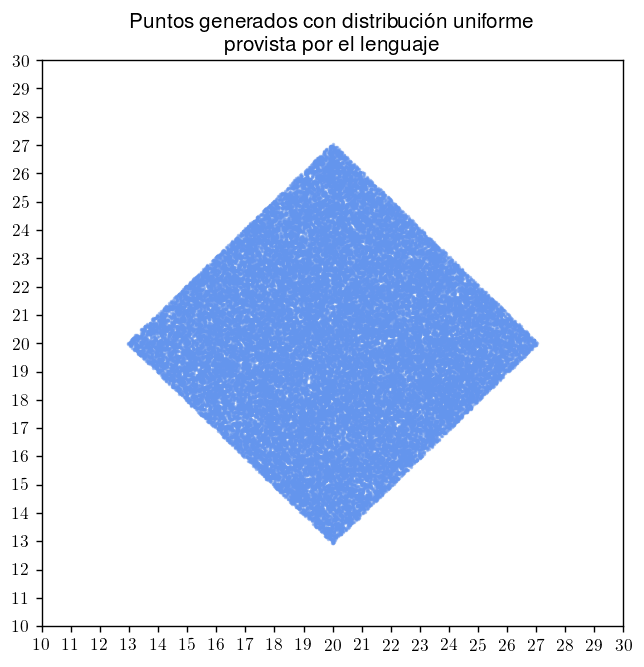

In [12]:
random.seed(SEED)
points = []
for i in range(100000):
    x = random.uniform(20-50**(1/2), 20+50**(1/2))
    y = random.uniform(20-50**(1/2), 20+50**(1/2))
    if point_valid(x,y):
        points.append((x,y))
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in points], [p[1] for p in points], color="cornflowerblue", alpha=0.5, s=1)
plt.xticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.yticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

b) Generadores de números al azar implementados con el algoritmo del ejercicio 1.

Vamos a generar tambien puntos con dos uniformes [$20-\sqrt{50}$, $20+\sqrt{50}$] pero utilizando nuestro generador

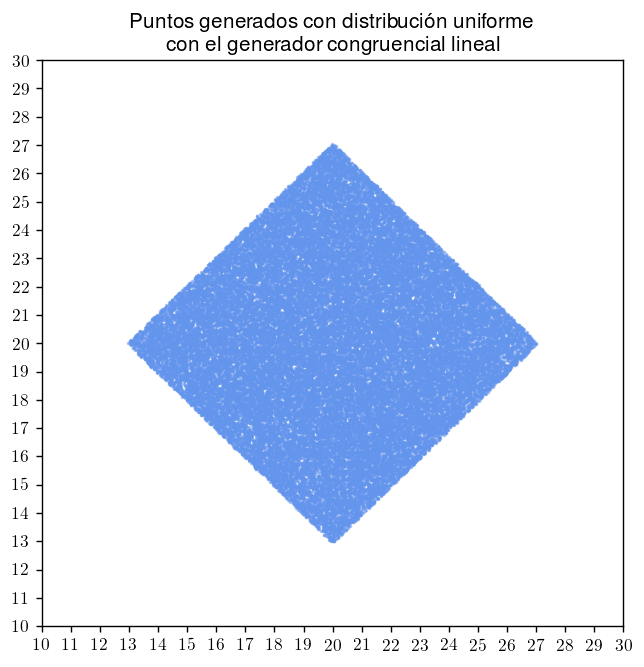

In [13]:
GCL_PREVIOUS_STATE = SEED
points = []
for i in range(100000):
    x = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    y = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    if point_valid(x,y):
        points.append((x,y))
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in points], [p[1] for p in points], color="cornflowerblue", alpha=0.5, s=1)
plt.xticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.yticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.title("Puntos generados con distribución uniforme\n con el generador congruencial lineal")
plt.show()

c) Calcule el factor de rendimiento del método.

El factor de rendimiento es los puntos que estamos utilizando sobre los puntos totales generados

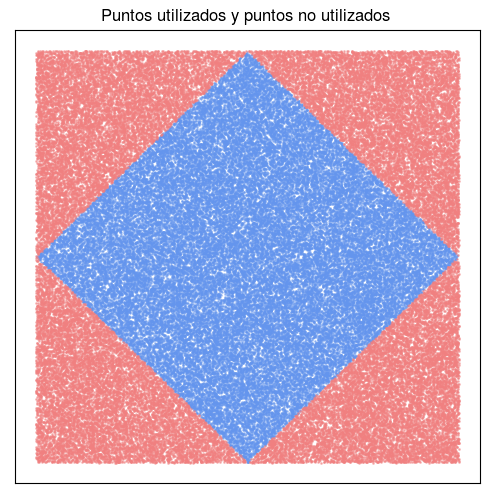

In [14]:
random.seed(SEED)
points = []
unused_points = []
for i in range(100000):
    x = random.uniform(20-50**(1/2), 20+50**(1/2))
    y = random.uniform(20-50**(1/2), 20+50**(1/2))
    if point_valid(x,y):
        points.append((x,y))
    else:
        unused_points.append((x,y))
plt.figure(dpi=100, figsize=(6, 6))
plt.scatter([p[0] for p in points], [p[1] for p in points], color="cornflowerblue", alpha=0.5, s=1, label="Puntos útiles")
plt.scatter([p[0] for p in unused_points], [p[1] for p in unused_points], color="lightcoral", alpha=0.5, s=1, label="Puntos no utilizados")
plt.xticks([],[])
plt.yticks([],[])
plt.title("Puntos utilizados y puntos no utilizados")
plt.show()

Como la densidad es proporcional al area total solo debemos calcular

$$\frac{Area\ util}{Area\ total}$$

Donde el area útil es la correspondiente a la de un cuadrado de 10x10, osea 100. El area total generada con las uniformes es la correspondiente a un cuadrado de lado $2\sqrt{50}=14.1421$, por lo que el area es 200.

El factor de rendimiento entonces es:

$$\frac{100}{200}=0.5$$

d) Proponga el test que considere necesario para demostrar que los números generados siguen la distribución pedida.

Si rotamos los puntos generados 45° respecto del centro (20,20) obtendremos un cuadrado tal que:

$$y\geq20-\sqrt{50} \land y\leq20+\sqrt{50}\\
x\geq20-\sqrt{50} \land x\leq20+\sqrt{50}$$

Podremos dividirlo en una grilla de 5x5 cuadrantes iguales en donde cada cuadrante sea equiprobable y hacer un test chi-cuadrado con significacia 10% y 100000 muestras para la equiprobabilidad de la cantidad de puntos en esos cuadrantes.

* H0: La distribución es uniforme
* H1: La distribución no es uniforme

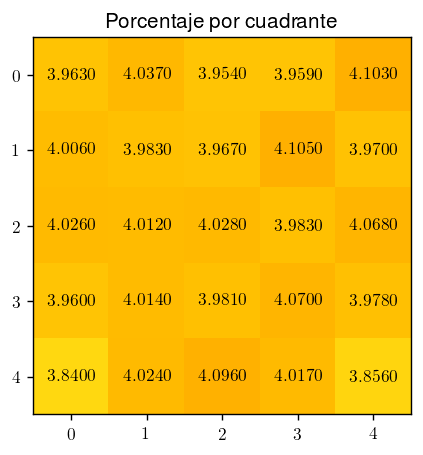

In [15]:
import math
def transform_in_unitary_square(x,y):
    new_x = (x-20)*math.cos(math.pi/4)-(y-20)*math.sin(math.pi/4)
    new_y = (x-20)*math.cos(math.pi/4)+(y-20)*math.sin(math.pi/4)
    new_x /= 10
    new_y /= 10
    new_x += 0.5
    new_y += 0.5
    return new_x, new_y
    
def get_quadrant_tuple(x,y):
    x, y = transform_in_unitary_square(x,y)
    x_q = 4
    y_q = 4
    if x<(1/5):
        x_q = 0
    elif x>=(1/5) and x<(2/5):
        x_q = 1
    elif x>=(2/5) and x<(3/5):
        x_q = 2
    elif x>=(3/5) and x<(4/5):
        x_q = 3
    x = None
    
    if y<(1/5):
        y_q = 0
    elif y>=(1/5) and y<(2/5):
        y_q = 1
    elif y>=(2/5) and y<(3/5):
        y_q = 2
    elif y>=(3/5) and y<(4/5):
        y_q = 3
    
    return x_q, y_q

GCL_PREVIOUS_STATE = SEED
points = []
while len(points)<100000:
    x = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    y = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    if point_valid(x,y):
        points.append((x,y))

quadrants = []
for p in points:
    quadrants.append(get_quadrant_tuple(p[0], p[1]))
quadrant_occurences = Counter(quadrants)
quadrant_matrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        quadrant_matrix[i][j] = quadrant_occurences[(i,j)]
plt.figure(dpi=125)
plt.title("Porcentaje por cuadrante")
plt.imshow(quadrant_matrix/quadrant_matrix.sum(), cmap="Wistia",vmin=0.035,vmax=0.045)
for i in range(5):
    for j in range(5):
        plt.gca().text(j, i, r"$%.4f$"%(100*quadrant_matrix[i][j]/quadrant_matrix.sum()), 
                       ha="center", va="center", color="black")

Como tenemos 25 clases tenemos trabajamos con 24 grados de libertad 

$$X^2_{24,0.9}=33.1962$$

Las $p_i$ para cada cuadrante son:

$p_i=\frac{1}{25}$

Calculamos: 

$$D^2=\sum^24_{i=0}{\frac{(n_{obs i}-Np_i)^2}{Np_i}}$$

In [16]:
expected_proba = 1/25
d_squared = 0
sample_size = sum(quadrant_occurences.values())
for i in range(5):
    for j in range(5):
        d_squared += (quadrant_occurences[(i,j)]-sample_size*expected_proba)**2/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  10.0958


Como $D^2=10.0958 < D_α=33.1962$ no somos capaces de rechazar **H0**

# Ejercicio 4

Para la siguiente densidad de probabilidad, se pide:

a) Definir la función de densidad de probabilidad.

La funcion densidad de probabilidad es:

$$ f_x(x)=  \left\{
\begin{array}{ll}
      (x-1)*\frac{1}{9} & x>1 \land x<2 \\
      \frac{1}{9} & x\geq2 \land x<5 \\
      (x-5)*\frac{\frac{1}{5}-\frac{1}{9}}{2}+\frac{1}{9} & x\geq5 \land x<7 \\
      (x-7)*\frac{-1}{15}+\frac{1}{5} & x\geq7 \land x<10 \\
      0 & e.o.c. \\
\end{array} 
\right. $$ 

Verificamos que es una función de densidad válida:

$$\int_{-\infty}^{\infty} f_x(x)\ dx=\int_{1}^{2} (x-1)*\frac{1}{9}\ dx + 
\int_{2}^{5} \frac{1}{9}\ dx + 
\int_{5}^{7} (x-5)*\frac{\frac{1}{5}-\frac{1}{9}}{2}+\frac{1}{9}\ dx + 
\int_{7}^{10} (x-7)*\frac{-1}{15}+\frac{1}{5}\ dx\\
\int_{-\infty}^{\infty} f_x(x)\ dx = \frac{1}{18} + \frac{1}{3} + \frac{14}{45} + \frac{3}{10} = 1$$

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

$$F_x(x)=\int_{-\infty}^{x} f_x(x)\ dx= \left\{
\begin{array}{ll}
      0 & x\leq1 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{x} & x\geq1 \land x\leq2 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{2} + 
      \frac{x}{9}\rvert_{2}^{x} & x>2 \land x\leq5 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{2} + 
      \frac{x}{9}\rvert_{2}^{5} +
      \frac{1}{45}(x^2-5x)\rvert_{5}^{x} & x>5 \land x\leq7 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{2} + 
      \frac{x}{9}\rvert_{2}^{5} +
      \frac{1}{45}(x^2-5x)\rvert_{5}^{7} +
      (\frac{2x}{3}-\frac{x^2}{30})\rvert_{7}^{x} & x>7 \land x\leq10 \\
      1 & x>10 \\
\end{array} 
\right. $$

In [17]:
def barrow(fun, inf, sup):
    return fun(sup)-fun(inf)

assert round(barrow(lambda x: ((x**2)/2-x)*(1/9), 1, 2), 5) == round((1/18), 5)
assert round(barrow(lambda x: (x/9), 2, 5), 5) == round((1/3), 5)
assert round(barrow(lambda x: (1/45)*(x**2-5*x), 5, 7), 5) == round((14/45), 5)
assert round(barrow(lambda x: ((2*x/3)-(x**2/30)), 7, 10), 5) == round((3/10), 5)

def pmf_x(x):
    if x<=1:
        return 0
    elif x>1 and x<=2:
        return barrow(lambda x: ((x**2)/2-x)*(1/9), 1, x)
    elif x>2 and x<=5:
        return pmf_x(2) + barrow(lambda x: (x/9), 2, x)
    elif x>5 and x<=7:
        return pmf_x(5) + barrow(lambda x: (1/45)*(x**2-5*x), 5, x)
    elif x>7 and x<=10:
        return pmf_x(7) + barrow(lambda x: ((2*x/3)-(x**2/30)), 7, x)
    return 1

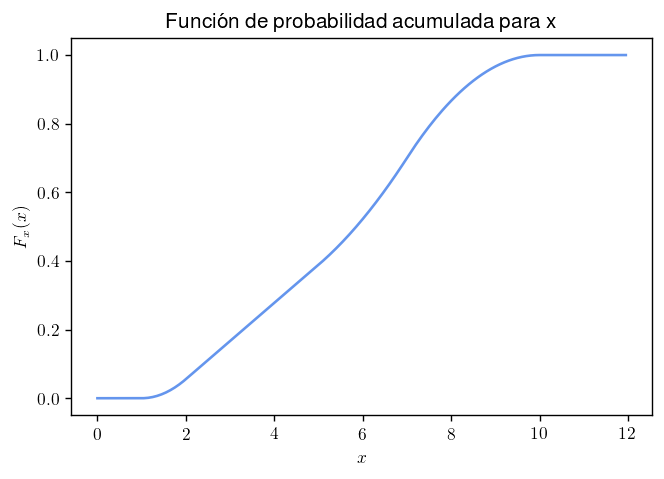

In [18]:
points = np.arange(0, 12, 0.05).tolist()
values = [pmf_x(p) for p in np.arange(0, 12, 0.05)]
plt.figure(dpi=125)
plt.plot(points, values, color="cornflowerblue")
plt.title("Función de probabilidad acumulada para x")
plt.xlabel(r"$x$")
plt.ylabel(r"$F_x(x)$")
plt.show()

Continuamos con la función inversa. Debido a la complejidad analítica de la función de probabilidad acumulada utilizaremos una aproximación basada en búsqueda binaria con una precisión fija de 5 decimales.

In [19]:
def approximate_inverse_pmf(pmf, p, minimum=-1000, maximum=1000):
    sup_pivot = maximum
    inf_pivot = minimum
    x = (inf_pivot+sup_pivot)/2
    actual_p = pmf(x)
    while round(actual_p, 5) != round(p, 5):
        if actual_p < p:
            inf_pivot = x
        else:
            sup_pivot = x
        x = (inf_pivot+sup_pivot)/2
        actual_p = pmf(x)
    return x

assert round(approximate_inverse_pmf(pmf_x, 7/18, 1, 11)) == round(5, 5)
assert round(approximate_inverse_pmf(pmf_x, 7/10, 1, 11)) == round(7, 5)

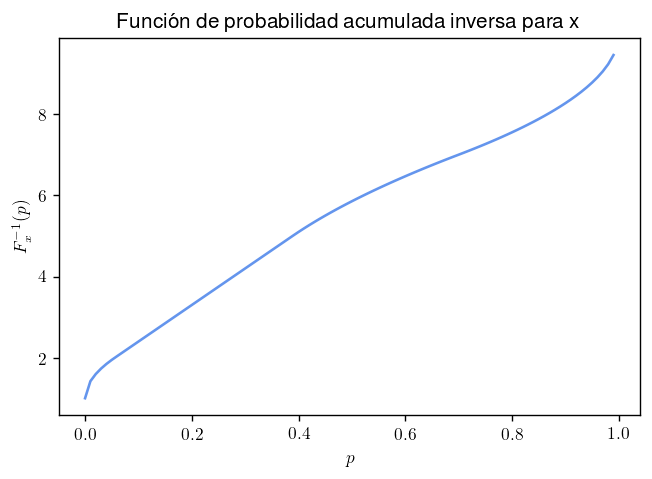

In [20]:
points = np.arange(0, 1, 0.01).tolist()
values = [approximate_inverse_pmf(pmf_x, p, 1, 11) for p in np.arange(0, 1, 0.01)]
plt.figure(dpi=125)
plt.plot(points, values, color="cornflowerblue")
plt.title("Función de probabilidad acumulada inversa para x")
plt.xlabel(r"$p$")
plt.ylabel(r"$F^{-1}_x(p)$")
plt.show()

c) Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y aplicando el método de la transformada inversa, genere números al azar con la distribución propuesta.

Para generar números con el método de la transformada inversa a partir de una $\mathcal{U} \sim (0,1)$ a la distribucion de $X$ se debe:

1. Obtener un número $u_i$ de la uniforme
2. Con la función de probabilidad acumulada de la uniforme $F_u$ calcular la probabilidad acumulada de ese número $F_u(u_i)$
3. Con la probabilidad $F_u(u_i)=p_i$ obtener un número $x_i$ por medio de $F^{-1}_x(p_i)$

Este procedimiento se debe repetir para cuantos números se deseen. Obtendremos 100mil números de la distribución de $X$.
Sabemos que la PMF de la $\mathcal{U} \sim (0,1)$ es $F_u(u)=u$

In [21]:
GCL_PREVIOUS_STATE = SEED
x_samples = []
for i in range(100000):
    ui = gcl_between_0_and_1()
    pi=ui
    xi=approximate_inverse_pmf(pmf_x, pi, 1, 11)
    x_samples.append(xi)

d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

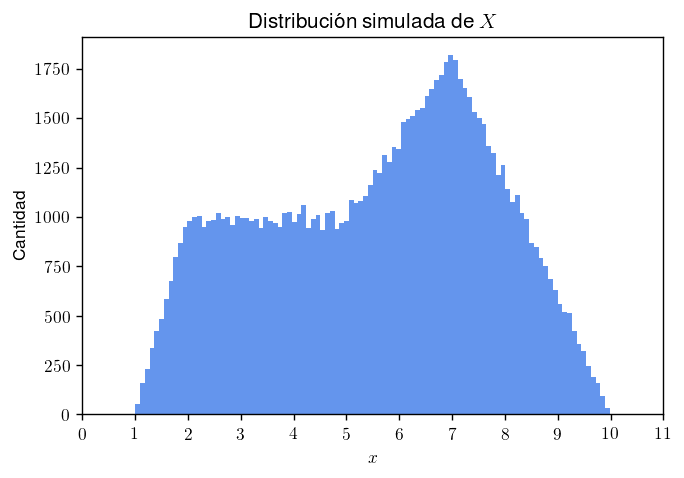

In [22]:
plt.figure(dpi=125)
plt.hist(x_samples, bins=100, color="cornflowerblue")
plt.title(r"Distribución simulada de $X$")
plt.xticks(list(range(12)), [r"$%d$"%i for i in range(12)])
plt.xlabel("$x$")
plt.ylabel("Cantidad")
plt.show()

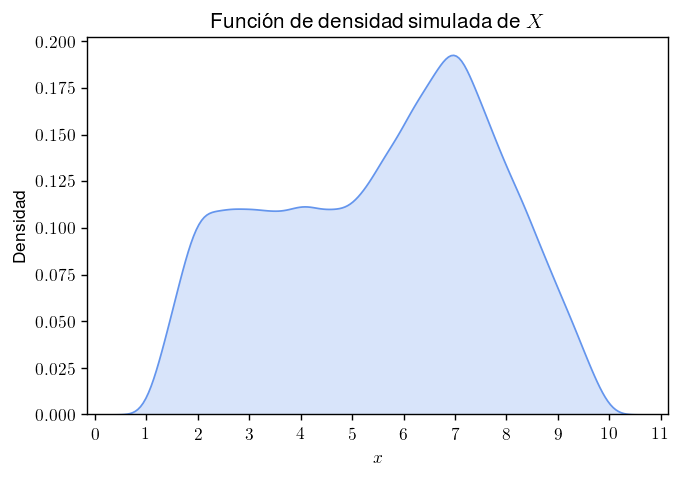

In [23]:
fig, ax = plt.subplots(dpi=125)
sns.kdeplot(x_samples, color="cornflowerblue", fill=True, ax=ax)
plt.title("Función de densidad simulada de $X$")
plt.xticks(list(range(12)), ["$%d$"%i for i in range(12)])
plt.xlabel("$x$")
plt.ylabel("Densidad")
plt.show()

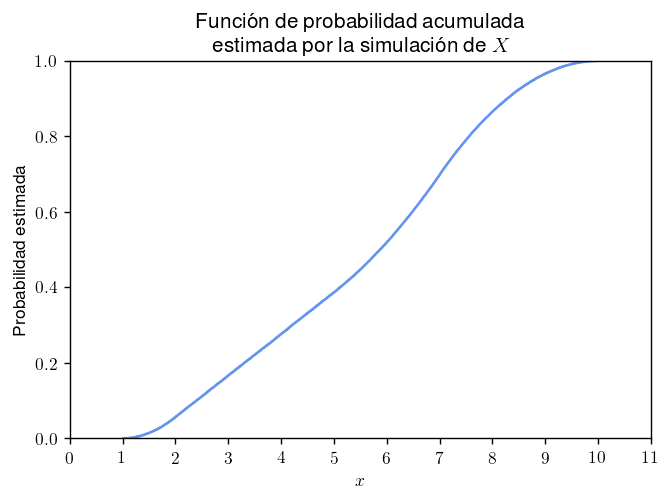

In [24]:
fig, ax = plt.subplots(dpi=125)
sns.ecdfplot(x_samples, color="cornflowerblue", ax=ax)
plt.title("Función de probabilidad acumulada\n estimada por la simulación de $X$")
plt.xticks(list(range(12)), ["$%d$"%i for i in range(12)])
plt.xlabel("$x$")
plt.ylabel("Probabilidad estimada")
plt.show()

# Ejercicio 5

a) Desarrolle un algoritmo para generar la distribución de probabilidad anterior utilizando el generador de números
aleatorios implementado en el ejercicio 1

Para generar la variable pedida dividimos el espacio muestral de nuestra uniforme tal que la probabilidad de caer en una de las divisiones coincida con la probabilidad del valor correspondiente de la distribución discreta. Para el caso particular de la $\mathcal{U} \sim (0,1)$ la probabilidad es igual a la longitud.

/home/jian01/.pyenv/versions/3.6.9/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


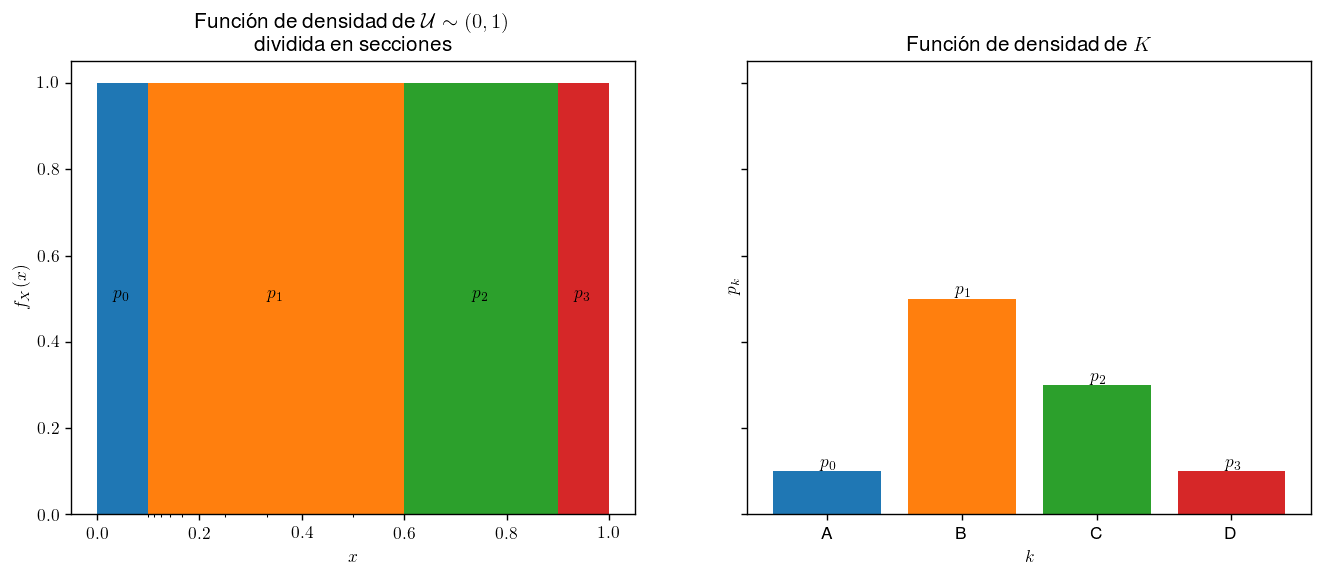

In [49]:
fig, axs = plt.subplots(1, 2, dpi=125, figsize=(6.4*2, 4.8), sharey=True)
axs[0].hist([0.05], bins=[0, 0.1])
axs[0].hist([0.2], bins=[0.1, 0.6])
axs[0].hist([0.7], bins=[0.6, 0.9])
axs[0].hist([0.95], bins=[0.9, 1])
axs[0].text(0.05-0.02, 0.5, "$p_0$")
axs[0].text(0.35-0.02, 0.5, "$p_1$")
axs[0].text(0.75-0.02, 0.5, "$p_2$")
axs[0].text(0.95-0.02, 0.5, "$p_3$")
axs[0].set_title("Función de densidad de $\mathcal{U} \sim (0,1)$\n dividida en secciones")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$f_X(x)$")
axs[0].set_xticks([1/i for i in range(1,11)], ["$\frac{1}{%d}$"%i for i in range(1,11)])
b1= axs[1].bar(["A"], [0.1])
b2= axs[1].bar(["B"], [0.5])
b3= axs[1].bar(["C"], [0.3])
b4= axs[1].bar(["D"], [0.1])
i=0
for rect in b1 + b2 + b3 + b4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '$p_%d$' % i, ha='center', va='bottom')
    i+=1
axs[1].set_title("Función de densidad de $K$")
axs[1].set_ylabel("$p_k$")
axs[1].set_xlabel("$k$")
plt.show()

Entonces para simular la variable:
1. Tomamos una muestra $x_i$ de la uniforme
2. Nos fijamos en que intervalo cae
3. Asignamos según el intervalo esa muestra al correspondiente $k_i$

Repetimos este proceso las veces que sean necesarias, en este caso tomaremos una muestra de tamaño 100mil.

In [66]:
GCL_PREVIOUS_STATE=SEED
k_samples = []
for _ in range(1000000):
    xi = gcl_between_0_and_1()
    if xi<= 0.1:
        k_samples.append("A")
    elif xi<=0.6:
        k_samples.append("B")
    elif xi<=0.9:
        k_samples.append("C")
    else:
        k_samples.append("D")

b) Mostrar la distribución obtenida en un histograma.

/home/jian01/.pyenv/versions/3.6.9/envs/general/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


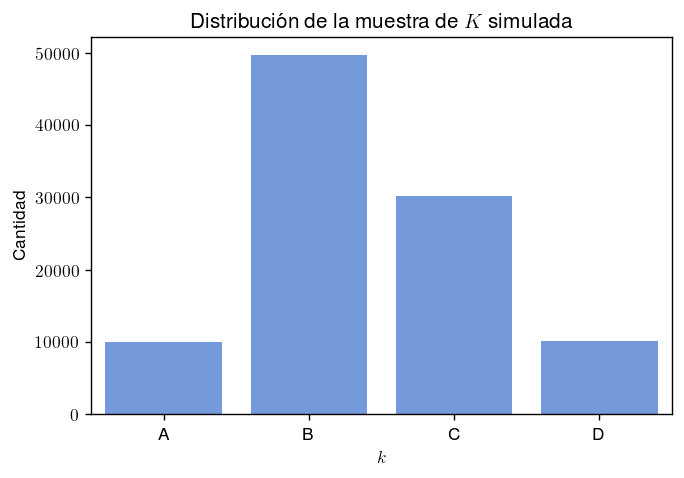

In [56]:
plt.figure(dpi=125)
sns.countplot(k_samples, color="cornflowerblue", order=["A", "B", "C", "D"])
plt.xlabel("$k$")
plt.ylabel("Cantidad")
plt.title("Distribución de la muestra de $K$ simulada")
plt.show()

c) Proponga un test para aplicarle a los números al azar generados, y evalúe si los mismos pueden ser aceptados.

Proponemos el test chi cuadrado con una significancia del 1% para las siguientes hipótesis:
* H0: La distribución simulada se distribuye como $K$
* H1: La distribución simulada no se distribuye como $K$

Al tener 4 valores posibles tenemos 3 grados de libertad por lo que

$$X^2_{3,0.99}=11.345$$

Sabemos que la probabilidad de cada dígito debiera ser $p_k$, calculamos: 

$$D^2=\sum^D_{A}{\frac{(n_{obs k}-Np_k)^2}{Np_k}}$$

In [68]:
k_frequencies = Counter(k_samples)
expected_proba = {"A": 0.1, "B": 0.5, "C": 0.3, "D": 0.1}
d_squared = 0
sample_size = sum(k_frequencies.values())
for k in k_frequencies.keys():
    d_squared += (k_frequencies[k]-sample_size*expected_proba[k])**2/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  9.33826


Como $D^2=9.33826 < D_α=11.345$ no somos capaces de rechazar **H0**